## Lab9 - Linear Regression
* submitted by Subrahmanyam (MM20S300)

### Q) Univariate LR / Single Variable / Single feature

1) For the data in the attached file (univariate_linear_regression.csv), 
- (a) do the linear regression (best line fit) using steepest gradient descent with line (univariate) search.
- (b) Plot the best fit line, cost function as well as the contour plot of the cost function.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('univariate_linear_regression.csv')
df.head()

,x,y
0,-1.932,-13.569
1,-2.953,-19.207
2,8.879,17.665
3,9.259,15.835
4,3.033,-0.495


In [4]:
class LinearRegression:
    '''
    This is a Linear Regression model for univariate case 
    It fits a best line minimizing mean squared error
    '''
    def __init__(self,x,y,alpha = 0.01, w0=0,w1=0):
        '''
        x: feature (1D)
        y: label
        alpha: 0.01 - fixed learning rate
        w0,w1: weiaghts/ parameters
        '''
        self.x=x
        self.y=y
        self.alpha = alpha
        self.w0 = 0
        self.w1 = 0
        self.j = 0
        assert len(x) == len(y), 'x and y have different no.of rows'
        
    def hyp_predict(self,x):
        '''
        Returns the hypothesis function of line
        Y = w0 + w1*x - prediction
        '''
        return self.w0 + self.w1 * x
    
    def cost_der(self,j):
        '''
        Returns derivative of cost function
        '''
        x,y,w0,w1 = self.x,self.y,self.w0,self.w1
        pred = self.hyp_predict
        
        der = sum([(pred(xi)-yi) if j==0 else (pred(xi)-yi)*xi for xi,yi in zip(x,y)])/len(x)
        return der 
    
    def weights_update(self,j):
        '''
        Uses steepest descent method to update the weights: w(k+1) = w(k) - alpha * grad(J)
        '''
        if j==0:
            self.w0 -= self.alpha * self.cost_der(j)
        elif j==1:
            self.w1 -= self.alpha * self.cost_der(j)
        
    def stop(self, max_iter = 1000):
        self.j += 1
        if self.j == max_iter:
            return True
        else:
            return False
        
    def fit(self):
        self.j = 0
        while True:
            if self.stop():
                break
            else:
                self.weights_update(0)
                self.weights_update(1)

In [9]:
#from ml_models import LinearRegression
x=df['x']
y=df['y']
lr_model = LinearRegression(x,y)
lr_model.fit()

print(f'The predicted value for x = 44 is {lr_model.hyp_predict(44)}')
w0,w1 = lr_model.w0,lr_model.w1
print(f'The final weights that minimize the cost function are w0 = {w0}, w1 = {w1}')

The predicted value for x = 44 is 120.73037373732838
The final weights that minimize the cost function are w0 = -10.064647598763752, w1 = 2.9726141212748214


### Best fit line plot

In [10]:
line_fit = w0 + w1 * x

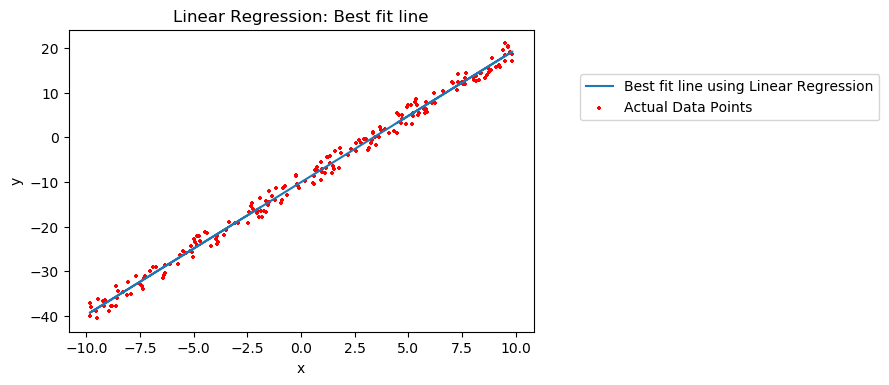

In [13]:
fig = plt.figure(figsize=(6,4),dpi=100)
plt.scatter(x,y,color = 'red',marker = '+',s=5)
plt.title('Linear Regression: Best fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, line_fit)
plt.legend(loc=(1.1,0.7),labels=['Best fit line using Linear Regression','Actual Data Points'])

### Surface and contour plots of cost function

In [14]:
def cost_fun(w0, w1, x, y):
    h = 0
    for i in range(len(x)):
        h += (((w0 + (w1 * x[i])) - y[i]) **2)
    J = (1/2*len(x)) * h
    return J

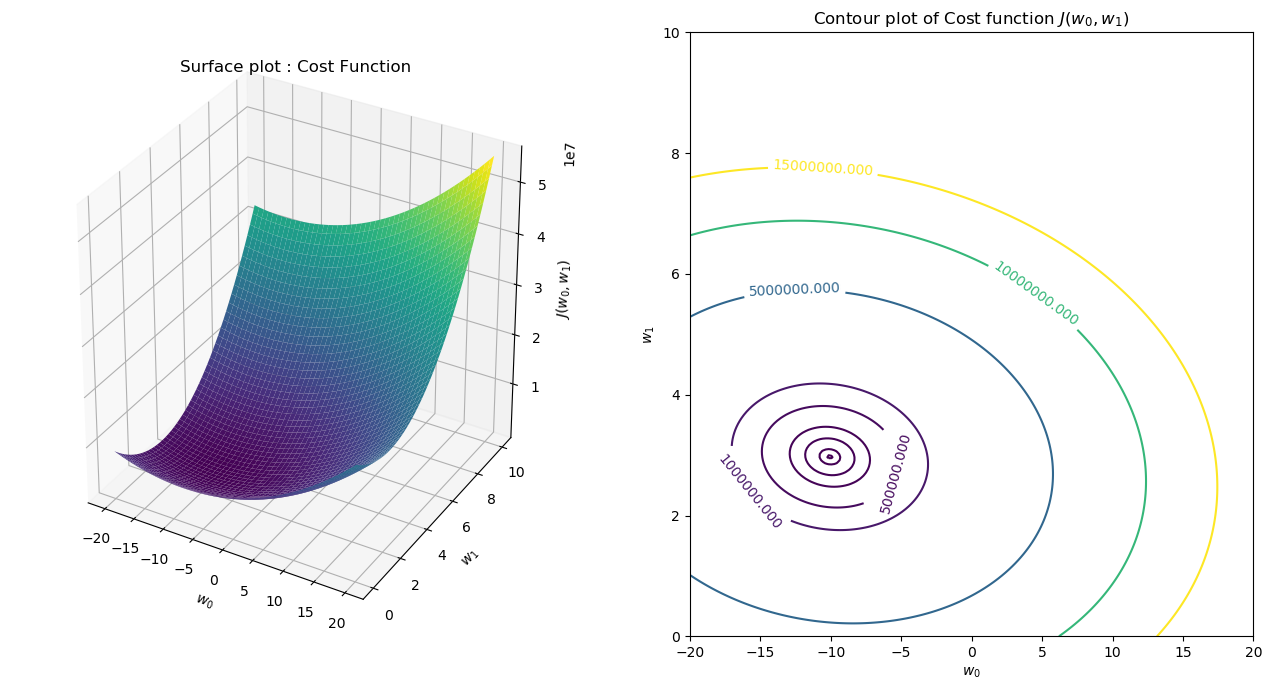

In [15]:
w0 = np.linspace(-20, 20,200)
w1 = np.linspace(0, 10,200)
W0, W1 = np.meshgrid(w0, w1)
fig = plt.figure(figsize = (16,8),dpi=100)
ax1 = fig.add_subplot(121, projection = '3d',title = r'Surface plot : Cost Function',xlabel=r'$w_0$',ylabel=r'$w_1$',zlabel = r'$J(w_0,w_1)$')
ax1.plot_surface(W0, W1, cost_fun(W0, W1, x, y), cmap = 'viridis')
ax2 = fig.add_subplot(122,title = r'Contour plot of Cost function $J(w_0,w_1)$ ',xlabel=r'$w_0$',ylabel=r'$w_1$')
cs = plt.contour(W0,W1,cost_fun(W0, W1, x, y),[np.min(cost_fun(W0, W1, x, y)),0.04e6,0.05e6,0.1e6,0.2e6,0.5e6,1e6,5e6,10e6,15e6])
plt.clabel(cs,fontsize=10);

### From the contour plot
- we can observe that the min lies approximately at (-10,3)

### Using line search for alpha

In [ ]:
dw = 0.001
def J(w):
    return cost_fun(w[0],w[1],x,y)

def Jdash(w,dw):
    return (J(w+dw) - J(w-dw))/2*dw

def Jddash(w,dw):
    return (J(w+dw) - 2*J(w) + J(w-dw))/dw**2

def gradJ(w):
    dJdw0 = (1/len(x))*sum([(w[0]+w[1]*x[i]-y[i]) for i in range(len(x))])
    dJdw1 = (1/len(x))*sum([(w[0]+w[1]*x[i]-y[i])%x[i] for i in range(len(x))])
    return np.array([dJdw0, dJdw1])

def newton_raphson(J,w,eps):
    
    while abs(Jdash(w,dw)) > eps:
        w = w - Jdash(w,dw)/Jddash(w,dw)
    return w


def unisearch(J,init,s,eps,alpha):
    w = init + alpha*s
    w_opt = newton_raphson(J,w,eps)
    alpha_opt = (w_opt-init)/s
    return w_opt,alpha_opt[0]


def steepest_descent(J,w,eps,alpha):
    
    while np.linalg.norm(gradJ(w)) > eps:
        s = -gradJ(w)
        a = unisearch(J,w,s,eps,alpha)
        w = a[0]
        
    return w
        
w_opt = steepest_descent(J,np.array([2,1]),10e-3,0.5)

print(f'The minimum point is {w_opt} and the function value is {J(w_opt)}') 